# Bee Smart
 The objective of this project is to make a predictive model using AI about a bee behavoir during the day to detect anomalies and therefore know what's the cause in a pursuit to preserve this animals. 

 The idea for the data is classify them in 4 categories
1. BTE (by the entry) - short intervals of time, from 1 sec up to 3 min in where the bee is in the entrance (_piquera_) or over the reader (max of 30 min).
2. SM (short mission)- short activity between 3 - 6 min.
3. FG (foraging) - forage and exploration activity, from 6 minutes up to 6 hours. 
4. DB (departed bee) - last detection of every bee during its life

The data is in two main sets, one already labeled and the other one in raw

In the classification we consider to acitvity hours categories: 
1. Sunrise (7am - 12pm)
2. Sunset (12pm- 7pm)

 

    *Papers about similar projects in the past can be found at the end of this notebook.*



## 1. Raw data exploration and filtering
First we download the csv and filter the data, we have already a labeled archive but we're going to try to labeled by our own and compare results later. 


In [209]:
import pandas as pd

# Set the path for files
general_path = '/Users/ralo/Library/CloudStorage/OneDrive-UNIVERSIDADNACIONALAUTÓNOMADEMÉXICO/TECNOLOGÍA/' # General path for data files
filtered_data_path = 'Semestre 7/BeeSmart/data/filtered_data_sensors.csv'
raw_copy_MH1_path = 'Semestre 7/BeeSmart/data/raw_copy_MH1Exploration.xlsx'
raw_copy_MH2_path = 'Semestre 7/BeeSmart/data/raw_copy_MH2Exploration.xlsx'

# load them as datasets
df_filtered = pd.read_csv(general_path + filtered_data_path)
df_raw_MH1 = pd.read_excel(general_path + raw_copy_MH1_path, sheet_name=None) 
""" We add the sheetname=none to add all the sheets of our excel document, its important to notice that this creates a dictionary of dataframes not a single
dataframe, therefore if we want to acces to every sheet we use the key, or the index or the sheet name"""
df_raw_MH2 = pd.read_excel(general_path + raw_copy_MH2_path, sheet_name=None)

/opt/anaconda3/envs/bee_smart/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/envs/bee_smart/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/envs/bee_smart/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/envs/bee_smart/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/envs/bee_smart/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaco

Watching the column names for our filtered dataset

As we mentioned before, this dataset is already filtered and labeled so no further filtering is required

In [210]:
df_filtered.head()

,Hive,Week,fecha,id,horario,behav,minutes,logmin
0,H2,W1,01/07/16,10,sunset,DB,0.016667,-1.778151
1,H2,W1,01/07/16,2,sunset,BTE,0.016667,-1.778151
2,H2,W1,01/07/16,2,sunset,BTE,0.016667,-1.778151
3,H2,W1,01/07/16,2,sunset,DB,0.016667,-1.778151
4,H2,W1,01/07/16,2,sunset,DB,0.016667,-1.778151


Watching the name of our sheets in the raw data

In [211]:
print(df_raw_MH1.keys())

dict_keys(['1Jul16', '2Jul16', '3Jul16', '4Jul16', '5Jul16', '6Jul16', '7Jul16', '8Jul16', '9Jul16', '10Jul16', '11Jul16', '12Jul16', '13Jul16', '14Jul16', '15Jul16', '16Jul16', '17Jul16', '18Jul16', '19Jul16', '20Jul16', '21Jul16', '22Jul16', '23Jul16', '24Jul16', '25Jul16', '26Jul16', '27Jul16', '28Jul16', '29Jul16', '30Jul16', '31Jul16', '1Ago16', '2Ago16', '3Ago16', '4Ago16', '5Ago16', '6Ago16', '7Ago16', '8Ago16', '9Ago16', '10Ago16', '11Ago16', '12Ago16', '13Ago16', '14Ago16', '15Ago16', '16Ago16', '17Ago16', '18Ago16', '19Ago16', '20Ago16', '21Ago16', '22Ago16', '23Ago16', '24Ago16', '25Ago16', '26Ago16'])


With a manual check we saw that for raw MH1 we have one excel sheet for every day, but not all days have data, with that knowledge lets delete them

In [212]:
# Converting keys to a list to acces them by index
sheet_names = list(df_raw_MH1.keys())

# Indexes to drop (days without data) (July 1, 4, 5, 6, 7)
drop = [0, 3, 4, 5, 6]

# Drop 
for idx in drop: 
    sheet = sheet_names[idx]
    df_raw_MH1.pop(sheet, None)



Now that we've filtered all the days without data we can concat all other sheets to create a unique dataframe, also we add a first column, day, to identify flights per day way more easily.

In [213]:
# Prepare a list for the processed DataFrames
dfs_with_day = []

# Enumerate through each sheet, adding a DAY column
for i, (sheet_name, df) in enumerate(df_raw_MH1.items(), start=1):
    if not df.empty:  # skip empty sheets
        df["DAY"] = i   # assign day number
        dfs_with_day.append(df)

df_raw_MH1 = pd.concat(df_raw_MH1.values(), ignore_index=True)
df_raw_MH1.head()

,# bee_detection_data v_1_1_3,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Colmena,ID,Tiempo,Horam,HoraS,Horadecimal,Hora MX(-5),Hora_negativo,Hora_entero,Minutos,Segundos,Duracion (hr),Duracion(min),DAY
0,20160702T171250Z,870020100100104300000023,7358E280113020002453172E,1530U2127,Edison-fzed437d00cex501,NaN,1,23,171250,0.200000,0.013889,17.213889,12.213889,NaN,12,12,50,NaN,NaN,1
1,20160703T152446Z,870020100100104300000004,27DDE2801130200028A017CB,1530U2127,Edison-fzed437d00cex501,NaN,1,4,152446,0.400000,0.012778,15.412778,10.412778,NaN,10,24,46,NaN,NaN,2
2,20160708T152037Z,870020100100104300000064,4B7BE2801130200024D0162D,1530U2127,Edison-fzed437d00cex501,NaN,1,064,152037,0.333333,0.010278,15.343611,10.343611,NaN,10,20,37,NaN,NaN,3
3,20160708T154856Z,870020100100104300000093,D483E28011302000205B17A2,1530U2127,Edison-fzed437d00cex501,NaN,1,093,154856,0.800000,0.015556,15.815556,10.815556,NaN,10,48,56,NaN,NaN,3
4,20160708T155529Z,FFFFFFFFFFFFFFFFFFFFFFFF,CE8CE28011302000205F17DE,1530U2127,Edison-fzed437d00cex501,NaN,F,FFF,155529,0.916667,0.008056,15.924722,10.924722,NaN,10,55,29,NaN,NaN,3


The first 5 columns of our dataset are useless in this project, as the IDs they represent are not useful at al here. Therefore we can delete them to only have the parameters we care about.

Also we're deleting row where colmena = "F" & ID = "FFF", this are just very few rows, so this decisition will not have any serious impact in the training of the model

In [214]:
# Droping columns from index 0 to 5
df_raw_MH1 = df_raw_MH1.drop(df_raw_MH1.iloc[:, 0:6], axis = 1) # As we are deleting by index, be aware of not rerun this cell more than once, as it will delete columns we don't want to be deleted
# Looking the new df with this columns deleted
df_raw_MH1.head(15)


,Colmena,ID,Tiempo,Horam,HoraS,Horadecimal,Hora MX(-5),Hora_negativo,Hora_entero,Minutos,Segundos,Duracion (hr),Duracion(min),DAY
0,1,23,171250,0.200000,0.013889,17.213889,12.213889,NaN,12,12,50,NaN,NaN,1
1,1,4,152446,0.400000,0.012778,15.412778,10.412778,NaN,10,24,46,NaN,NaN,2
2,1,064,152037,0.333333,0.010278,15.343611,10.343611,NaN,10,20,37,NaN,NaN,3
3,1,093,154856,0.800000,0.015556,15.815556,10.815556,NaN,10,48,56,NaN,NaN,3
4,F,FFF,155529,0.916667,0.008056,15.924722,10.924722,NaN,10,55,29,NaN,NaN,3
5,F,FFF,155530,0.916667,0.008333,15.925000,10.925000,NaN,10,55,30,NaN,NaN,3
6,F,FFF,155531,0.916667,0.008611,15.925278,10.925278,NaN,10,55,31,NaN,NaN,3
7,1,056,160950,0.150000,0.013889,16.163889,11.163889,NaN,11,9,50,NaN,NaN,3
8,1,056,160951,0.150000,0.014167,16.164167,11.164167,NaN,11,9,51,NaN,NaN,3
9,F,FFF,161109,0.183333,0.002500,16.185833,11.185833,NaN,11,11,9,NaN,NaN,3


In [215]:
# Droping rows (4-6, 9-11), the ones that have FFF
df_raw_MH1 = df_raw_MH1.drop(df_raw_MH1.index[list(range(4,7)) + list(range(9,12))])
df_raw_MH1.head(10)



,Colmena,ID,Tiempo,Horam,HoraS,Horadecimal,Hora MX(-5),Hora_negativo,Hora_entero,Minutos,Segundos,Duracion (hr),Duracion(min),DAY
0,1,23,171250,0.200000,0.013889,17.213889,12.213889,NaN,12,12,50,NaN,NaN,1
1,1,4,152446,0.400000,0.012778,15.412778,10.412778,NaN,10,24,46,NaN,NaN,2
2,1,064,152037,0.333333,0.010278,15.343611,10.343611,NaN,10,20,37,NaN,NaN,3
3,1,093,154856,0.800000,0.015556,15.815556,10.815556,NaN,10,48,56,NaN,NaN,3
7,1,056,160950,0.150000,0.013889,16.163889,11.163889,NaN,11,9,50,NaN,NaN,3
8,1,056,160951,0.150000,0.014167,16.164167,11.164167,NaN,11,9,51,NaN,NaN,3
12,1,090,163319,0.550000,0.005278,16.555278,11.555278,NaN,11,33,19,NaN,NaN,3
13,1,071,194419,0.733333,0.005278,19.738611,14.738611,NaN,14,44,19,NaN,NaN,3
14,1,071,194420,0.733333,0.005556,19.738889,14.738889,NaN,14,44,20,NaN,NaN,3
15,1,071,195847,0.966667,0.013056,19.979722,14.979722,NaN,14,58,47,NaN,NaN,3


In [216]:
df_raw_MH1.shape 

(6045, 14)

We know are also dropping the columns Colmena, as all bees are from the same Hive, as well as Horam, Horadecimal, hora MX, Hora Negativo, Hora_entero, Minutos, Segundos as we can work only with Tiempo and make a conversation for what we need.

In [217]:
print(df_raw_MH1.columns.tolist())


['Colmena', 'ID', 'Tiempo', 'Horam', 'HoraS', 'Horadecimal', 'Hora MX(-5)', 'Hora_negativo', 'Hora_entero', 'Minutos', 'Segundos', 'Duracion (hr)', 'Duracion(min)', 'DAY']


In [218]:
df_raw_MH1 = df_raw_MH1.drop(['Colmena', 'Horam', 'HoraS', 'Horadecimal', 'Hora MX(-5)', 'Hora_negativo', 'Hora_entero', 'Minutos', 'Segundos', 'Duracion (hr)', 'Duracion(min)'], axis = 1)
df_raw_MH1.head()

,ID,Tiempo,DAY
0,23,171250,1
1,4,152446,2
2,064,152037,3
3,093,154856,3
7,056,160950,3


Finally, we're going to do a difference of (time - 5000) to match mexican hour, we dont care about post midnight flights (00:00:00) as they are not part of our final labelling proceess

In [219]:
df_raw_MH1["Tiempo"] -= 50000 

df_raw_MH1.head()

,ID,Tiempo,DAY
0,23,121250,1
1,4,102446,2
2,064,102037,3
3,093,104856,3
7,056,110950,3


We'll end here for this data set, the other one follows the same steps, but we're wotking on that one later

# 2. Labeling the raw data

Now that the data has been filtered we're going to work with them trying to classify each bee flight in to 4 categories explained at the begining. 

1. BTE (by the entry) - short intervals of time, from 1 sec up to 3 min in where the bee is in the entrance (_piquera_) or over the reader (max of 30 min).
2. SM (short mission)- short activity between 3 - 6 min.
3. FG (foraging) - forage and exploration activity, from 6 minutes up to 6 hours. 
4. DB (departed bee) - last detection of every bee during its life


In the classification we consider to acitvity hours categories: 
1. Sunrise (7am - 12pm)
2. Sunset (12pm- 7pm)

First we're going to divide between sunrise and sunset, and deleting all registers that dont match any of these labels

In [220]:
# Enumerate through each sheet, adding a Sunrise-Sunset Label
import numpy as np
df_raw_MH1["DayPeriod"] = np.where(
    (df_raw_MH1["Tiempo"] >= 70000) & (df_raw_MH1["Tiempo"] < 120000),
    "Sunrise",
    np.where(
        (df_raw_MH1["Tiempo"] >= 120000) & (df_raw_MH1["Tiempo"] < 190000), 
           "Sunset",
           np.nan
    )
)

df_raw_MH1 = df_raw_MH1[
    ((df_raw_MH1["Tiempo"] >= 70000) & (df_raw_MH1["Tiempo"] < 120000)) |
    ((df_raw_MH1["Tiempo"] >= 120000) & (df_raw_MH1["Tiempo"] < 190000))
]


df_raw_MH1.head()

,ID,Tiempo,DAY,DayPeriod
0,23,121250,1,Sunset
1,4,102446,2,Sunrise
2,064,102037,3,Sunrise
3,093,104856,3,Sunrise
7,056,110950,3,Sunrise


In [221]:
df_raw_MH1.shape


(5458, 4)

Now were goin to do this classification and create a new dataframe with this  information following the next rules


1. BTE (by the entry) - short intervals of time, from 1 sec up to 3 min in where the bee is in the entrance (_piquera_) or over the reader (max of 30 min).
2. SM (short mission)- short activity between 3 - 6 min.
3. FG (foraging) - forage and exploration activity, from 6 minutes up to 6 hours. 
4. DB (departed bee) - last detection of every bee during its life



In [222]:
# Function to convert hhmmss (int or str) → seconds
def hhmmss_to_seconds(x):
    x = int(x)
    hh = x // 10000
    mm = (x % 10000) // 100
    ss = x % 100
    return hh*3600 + mm*60 + ss

# Apply conversion
df_raw_MH1["Tiempo_sec"] = df_raw_MH1["Tiempo"].apply(hhmmss_to_seconds)

# Sort by ID, DAY, Tiempo
df_raw_MH1 = df_raw_MH1.sort_values(by=["ID", "DAY", "Tiempo_sec"])

# Compute duration (seconds) per bee per day
df_raw_MH1["Tiempo_diff"] = df_raw_MH1.groupby(["ID", "DAY"])["Tiempo_sec"].diff()

missions = []

for bee_id, group in df_raw_MH1.groupby(["ID", "DAY"]):
    group = group.sort_values("Tiempo").reset_index(drop=True)

    # Iterate in steps of 2 (departure-return pairs)
    for i in range(0, len(group), 2):
        if i + 1 < len(group):  # we have a return
            dep_time = group.loc[i, "Tiempo_sec"]
            ret_time = group.loc[i+1, "Tiempo_sec"]
            diff = ret_time - dep_time
            missions.append({
                "ID": bee_id[0],
                "DAY": bee_id[1],
                "DayPeriod": group.loc[i, "DayPeriod"],
                "Tiempo_dep": group.loc[i, "Tiempo"],
                "Tiempo_ret": group.loc[i+1, "Tiempo"],
                "Tiempo_diff": diff
            })
        else:
            # Last detection of this bee/day → Departed Bee (DB)
            missions.append({
                "ID": bee_id[0],
                "DAY": bee_id[1],
                "DayPeriod": group.loc[i, "DayPeriod"],
                "Tiempo_dep": group.loc[i, "Tiempo"],
                "Tiempo_ret": None,
                "Tiempo_diff": None,
                "Mission": "DB"
            })

df_missions = pd.DataFrame(missions)

def classify(diff):
    if pd.isna(diff):
        return np.nan
    elif 1 <= diff <= 180:      # 1s – 3min
        return "BTE"
    elif 180 < diff <= 360:     # 3 – 6min
        return "SM"
    elif 360 < diff <= 21600:   # 6min – 6h
        return "FG"
    else:
        return np.nan

df_missions["Mission"] = df_missions["Tiempo_diff"].apply(classify)

# Keep DB marks
df_missions.loc[df_missions["Mission"].isna() & df_missions["Tiempo_ret"].isna(), "Mission"] = "DB"


df_missions.head(100)



,ID,DAY,DayPeriod,Tiempo_dep,Tiempo_ret,Tiempo_diff,Mission
0,4,2,Sunrise,102446,NaN,NaN,DB
1,5,5,Sunset,132832,NaN,NaN,DB
2,23,1,Sunset,121250,NaN,NaN,DB
3,24,4,Sunrise,92809,93734.0,565.0,FG
4,24,4,Sunset,154431,154647.0,136.0,BTE
...,...,...,...,...,...,...,...
95,68,5,Sunrise,82015,82051.0,36.0,BTE
96,68,5,Sunrise,82052,82053.0,1.0,BTE
97,68,5,Sunrise,82116,82125.0,9.0,BTE
98,68,5,Sunrise,90522,90523.0,1.0,BTE


In [223]:
df_missions.shape

(2827, 7)

# 3. Building the Neural Network

To build the neural network we're going to use the same model presented in Olivares-Pinto et.al (2024). That looks as follows in the next image.
The reason to use a RNN with LSTM layers is that LSTM can modelate time dependencies, something really useful in this kind of data sets about bee flights over time.
Both layers are bidirectional, this way we can analyze past and futures patterns in each sequence.

Also as we need to remeber that our goal is to detect bee flight anomalies, so we don't really have a target varaible in our dataset, for that reason, is that we can say we're working with an unsupervised (or semi-supervised) learning problem.


<img src="RNN_preview.png" alt="RNN MODEL" width="400">

## 3.1 Own labeled model
First we´re training the dataframe we manually labeled, then we're trainign the already labeled dataset, anyways, as both process are really similar we are explaining in detail this one, and for the other one just the changes we made.

### 3.1.1 Transforming data
As we have DayPeriod Column and Mission column shown as strings, we need to convert these columns in something the network can understand. Also we need to transform the time variables into a 0-1 range to ensure same weight in training.



#### 3.1.1.1 Day period into binary values

In [224]:
for i in range (len(df_missions)): 
    if df_missions.loc[i, 'DayPeriod'] == 'Sunrise': 
        df_missions.loc[i, 'DayPeriod'] = 1
    else: 
        df_missions.loc[i, 'DayPeriod'] = 0

print("Day period after binary conversion", df_missions.head())

Day period after binary conversion    ID  DAY DayPeriod  Tiempo_dep  Tiempo_ret  Tiempo_diff Mission
0   4    2         1      102446         NaN          NaN      DB
1   5    5         0      132832         NaN          NaN      DB
2  23    1         0      121250         NaN          NaN      DB
3  24    4         1       92809     93734.0        565.0      FG
4  24    4         0      154431    154647.0        136.0     BTE


#### 3.1.1.2 Mission type into one-hot encode

In [225]:
df_missions = pd.concat(
    [df_missions, pd.get_dummies(df_missions['Mission'], prefix='Mission')],
    axis=1
)

df_missions = df_missions.drop(columns=['Mission'])

print("Data Frame after one hot encoding: \n", df_missions.head())

Data Frame after one hot encoding: 
    ID  DAY DayPeriod  Tiempo_dep  Tiempo_ret  Tiempo_diff  Mission_BTE  \
0   4    2         1      102446         NaN          NaN        False   
1   5    5         0      132832         NaN          NaN        False   
2  23    1         0      121250         NaN          NaN        False   
3  24    4         1       92809     93734.0        565.0        False   
4  24    4         0      154431    154647.0        136.0         True   

   Mission_DB  Mission_FG  Mission_SM  
0        True       False       False  
1        True       False       False  
2        True       False       False  
3       False        True       False  
4       False       False       False  


#### 3.1.1.3 Time into Min-Max Scaler

In [226]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing only the time-related columns
normalizer = MinMaxScaler()
df_missions[['Tiempo_dep', 'Tiempo_ret', 'Tiempo_diff']] = normalizer.fit_transform(
    df_missions[['Tiempo_dep', 'Tiempo_ret', 'Tiempo_diff']]
)

print("Values after normalization:\n", df_missions.head())


Values after normalization:
    ID  DAY DayPeriod  Tiempo_dep  Tiempo_ret  Tiempo_diff  Mission_BTE  \
0   4    2         1    0.269825         NaN          NaN        False   
1   5    5         0    0.535937         NaN          NaN        False   
2  23    1         0    0.434505         NaN          NaN        False   
3  24    4         1    0.185427    0.193526     0.021875        False   
4  24    4         0    0.725095    0.727004     0.005266         True   

   Mission_DB  Mission_FG  Mission_SM  
0        True       False       False  
1        True       False       False  
2        True       False       False  
3       False        True       False  
4       False       False       False  


### 3.1.2 Importing libraries for the LSTM model

In [227]:
# import numpy as np
# import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### 3.1.4 Dealing with NAs and types

In [228]:
df_missions = df_missions.apply(pd.to_numeric, errors='coerce')
df_missions = df_missions.fillna(0)
df_missions = df_missions.astype(np.float32)

print(df_missions.dtypes)

ID             float32
DAY            float32
DayPeriod      float32
Tiempo_dep     float32
Tiempo_ret     float32
Tiempo_diff    float32
Mission_BTE    float32
Mission_DB     float32
Mission_FG     float32
Mission_SM     float32
dtype: object


### 3.1.3 Creating the train test splits

*Note: that as we're working with an unsupervised model we dont have a Y df, or a target variable. ALso as we're working with time dependant series we can't use the usual sklearn train_test_split beacuase we dont want to shuffle the dataset.*

In [229]:
# Split into train/test (no y needed)
# Reshape the dataframe to (num_samples, num_features, 1) for LSTM input
df_missions_reshaped = df_missions.values.reshape((df_missions.shape[0], df_missions.shape[1], 1))

X_train, X_test = train_test_split(df_missions_reshaped, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2261, 10, 1)
Test shape: (566, 10, 1)


 ### 3.1.4 Buidling the LSTM model
 The model consist in onne LSTM layer, a dropout layer, another LSTM layer that is bidirectional and connect the first one, then another dorpout, a ReLU actiation and finally a sigmoid.

In [230]:

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    RepeatVector(X_train.shape[1]),  # Repeat for each timestep
    Bidirectional(LSTM(64, return_sequences=True)),
    TimeDistributed(Dense(X_train.shape[2], activation='linear'))  # reconstruct sequence
])

model.compile(optimizer='adam', loss='mse')

### 3.1.5 Fitting the model and validation techniques

In [231]:
history = model.fit(
    X_train, X_train,                  # input == output (autoencoder)
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    verbose=1
)


Epoch 1/30


2025-10-05 23:16:50.022729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-10-05 23:16:50.023115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-10-05 23:16:50.023485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

56/57 [============================>.] - ETA: 0s - loss: 4852.2573

2025-10-05 23:16:53.665281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-10-05 23:16:53.665762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-10-05 23:16:53.666255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

57/57 [==============================] - 4s 22ms/step - loss: 4862.0859 - val_loss: 4724.7573
Epoch 2/30
57/57 [==============================] - 1s 11ms/step - loss: 4409.7832 - val_loss: 4316.4932
Epoch 3/30
57/57 [==============================] - 1s 10ms/step - loss: 4067.4221 - val_loss: 4032.1370
Epoch 4/30
57/57 [==============================] - 1s 11ms/step - loss: 3807.3538 - val_loss: 3780.5422
Epoch 5/30
57/57 [==============================] - 1s 11ms/step - loss: 3573.7544 - val_loss: 3553.5991
Epoch 6/30
57/57 [==============================] - 1s 11ms/step - loss: 3362.3030 - val_loss: 3350.2095
Epoch 7/30
57/57 [==============================] - 1s 11ms/step - loss: 3170.0007 - val_loss: 3173.6687
Epoch 8/30
57/57 [==============================] - 1s 13ms/step - loss: 2993.6162 - val_loss: 2993.0662
Epoch 9/30
57/57 [==============================] - 1s 10ms/step - loss: 2820.6904 - val_loss: 2823.1169
Epoch 10/30
57/57 [==============================] - 1s 11ms/step 

### 3.1.6 Predictions

In [232]:
reconstructions = model.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=(1,2))
print("\nMean reconstruction error:", np.mean(mse))

2025-10-05 23:17:12.184386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-10-05 23:17:12.185055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-10-05 23:17:12.185426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

18/18 [==============================] - 1s 3ms/step

Mean reconstruction error: 747.2395


# 4. Results

## 4.1 Results in the own labeled dataframe

Reconstruction error threshold: 2853.651917


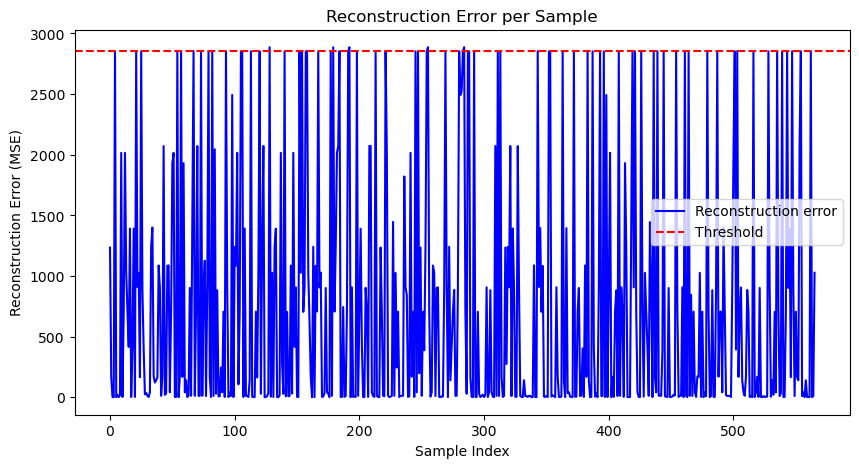

Normal flights: 537
Anomalous flights: 29


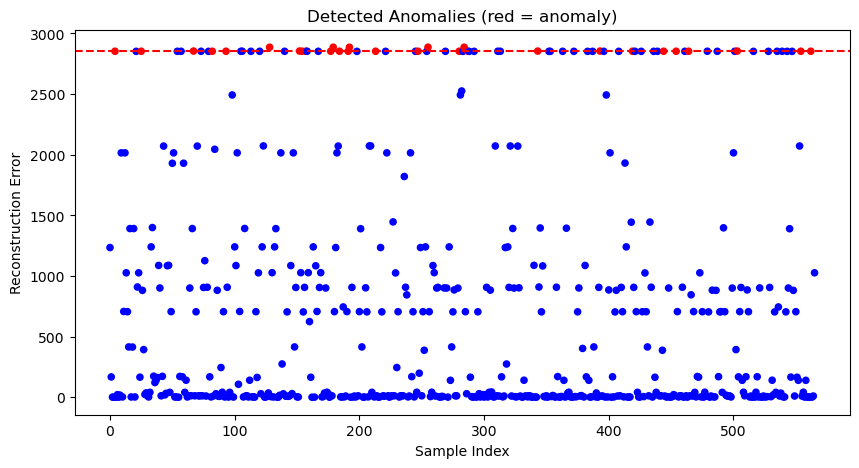

In [233]:

# Define a treshold for anomaly detection
threshold = np.percentile(mse, 95)  
print(f"Reconstruction error threshold: {threshold:.6f}")

# Classify points
anomalies = mse > threshold

# plot reconstruction errors
plt.figure(figsize=(10,5))
plt.plot(mse, label='Reconstruction error', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title("Reconstruction Error per Sample")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error (MSE)")
plt.legend()
plt.show()

# Summary of results
normal_count = np.sum(~anomalies)
anomaly_count = np.sum(anomalies)
print(f"Normal flights: {normal_count}")
print(f"Anomalous flights: {anomaly_count}")

# Scatter plot of reconstruction errors
plt.figure(figsize=(10,5))
plt.scatter(range(len(mse)), mse, c=['red' if a else 'blue' for a in anomalies], s=20)
plt.axhline(y=threshold, color='red', linestyle='--')
plt.title("Detected Anomalies (red = anomaly)")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.show()


As we can see here, our model is detecting 29 anomalous flights. Lets compare this results with the model fitted to the already labeled data

## 4.2 Results in the already labeled data

To check results we first need to do some adjustments to the code, it's the same we did with the other dataset so we're going faster

### 4.2.1 Converting the data and dropping some columns

In [234]:
# Droping columns that are not needed
df_filtered = df_filtered.drop(['id', 'fecha', 'logmin'], axis=1)

# Horario into binary
for i in range (len(df_filtered)): 
    if df_filtered.loc[i, 'horario'] == 'sunrise': 
        df_filtered.loc[i, 'horario'] = 1
    else: 
        df_filtered.loc[i, 'horario'] = 0

# mission type into one hot encoding
df_filtered = pd.concat(
    [df_filtered, pd.get_dummies(df_filtered['behav'], prefix='behav')],
    axis=1
)
df_filtered = df_filtered.drop(columns=['behav'])


In [235]:

# Normalizing time-related columns
normalizer = MinMaxScaler()
df_filtered[['minutes']] = normalizer.fit_transform(
    df_filtered[['minutes']]
)

# Hive column into binary
for i in range (len(df_filtered)): 
    if df_filtered.loc[i, 'Hive'] == 'H1': 
        df_filtered.loc[i, 'Hive'] = 1
    else: 
        df_filtered.loc[i, 'Hive'] = 0


In [236]:

# Week column into one hot encoding
df_filtered = pd.concat(
    [df_filtered, pd.get_dummies(df_filtered['Week'], prefix='Week')],
    axis=1
)
df_filtered = df_filtered.drop(columns=['Week'])


df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')
df_filtered = df_filtered.fillna(0)
df_filtered = df_filtered.astype(np.float32)
print(df_filtered.dtypes)


Hive         float32
horario      float32
minutes      float32
behav_BTE    float32
behav_DB     float32
behav_FG     float32
behav_SM     float32
Week_W1      float32
Week_W2      float32
Week_W3      float32
Week_W4      float32
Week_W5      float32
Week_W6      float32
Week_W7      float32
Week_W8      float32
dtype: object


### 4.2.2 Fitting the model in this data

#### 4.2.2.1 Split into train test

In [237]:
# Split into train/test (no y needed)
# Reshape the dataframe to (num_samples, num_features, 1) for LSTM input
df_filtered_reshaped = df_filtered.values.reshape((df_filtered.shape[0], df_filtered.shape[1], 1))

X_train_2, X_test_2 = train_test_split(df_filtered_reshaped, test_size=0.2, random_state=42)
print("Train shape:", X_train_2.shape)
print("Test shape:", X_test_2.shape)


Train shape: (66513, 15, 1)
Test shape: (16629, 15, 1)


#### 4.2.2.2 Fitting the model and predictions

We are going to call this model model 2, so that we can do a comparison later on

In [238]:
model_2 = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    RepeatVector(X_train_2.shape[1]),  # should be 1
    Bidirectional(LSTM(64, return_sequences=True)),
    TimeDistributed(Dense(X_train_2.shape[2], activation='linear'))
])
model_2.compile(optimizer='adam', loss='mse')

In [240]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',      # what metric to monitor
    patience=3,              # how many epochs to wait after last improvement
    min_delta=1e-4,          # minimum change to qualify as improvement
    restore_best_weights=True  # revert to best weights after stopping
)

history_2 = model_2.fit(
    X_train_2, X_train_2,                  # input == output (autoencoder)
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30


2025-10-05 23:18:41.577696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-10-05 23:18:41.578179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-10-05 23:18:41.578716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1661/1663 [============================>.] - ETA: 0s - loss: 0.0267

2025-10-05 23:19:07.627000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-10-05 23:19:07.627633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-10-05 23:19:07.627979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1663/1663 [==============================] - 28s 15ms/step - loss: 0.0266 - val_loss: 0.0032
Epoch 2/30
1663/1663 [==============================] - 25s 15ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 3/30
1663/1663 [==============================] - 25s 15ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 4/30
1663/1663 [==============================] - 24s 15ms/step - loss: 0.0014 - val_loss: 7.0943e-04
Epoch 5/30
1663/1663 [==============================] - 24s 15ms/step - loss: 0.0010 - val_loss: 3.6897e-04
Epoch 6/30
1663/1663 [==============================] - 25s 15ms/step - loss: 8.4336e-04 - val_loss: 5.5192e-04
Epoch 7/30
1663/1663 [==============================] - 24s 15ms/step - loss: 6.4356e-04 - val_loss: 5.5826e-04
Epoch 8/30
1663/1663 [==============================] - 25s 15ms/step - loss: 5.6456e-04 - val_loss: 2.8153e-04


As we can see since the very beginning the loss was very low that's why it stopped only after 4 epochs

In [243]:

reconstructions = model_2.predict(X_test_2)
mse = np.mean(np.power(X_test_2 - reconstructions, 2), axis=(1,2))
print("\nMean reconstruction error:", np.mean(mse))

2025-10-05 23:23:19.622952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-10-05 23:23:19.623360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-10-05 23:23:19.623803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

520/520 [==============================] - 3s 5ms/step

Mean reconstruction error: 0.0003533897


### 4.2.3 Graphs and accuracy metrics

Reconstruction error threshold: 0.000987


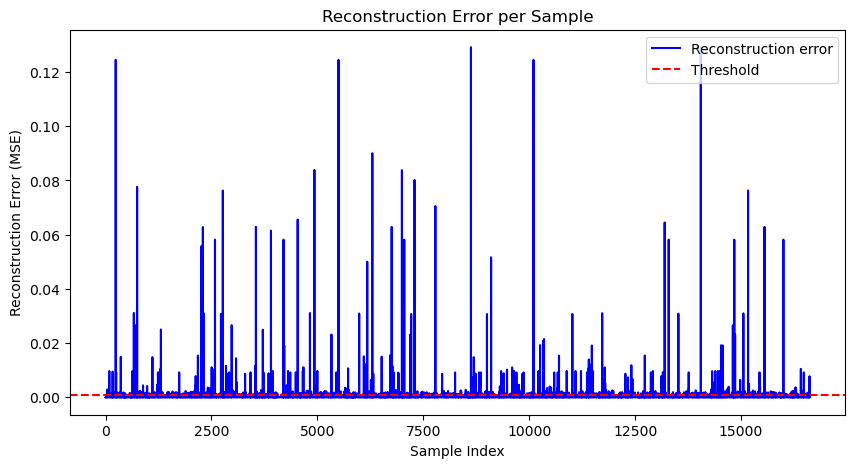

Normal flights: 15797
Anomalous flights: 832


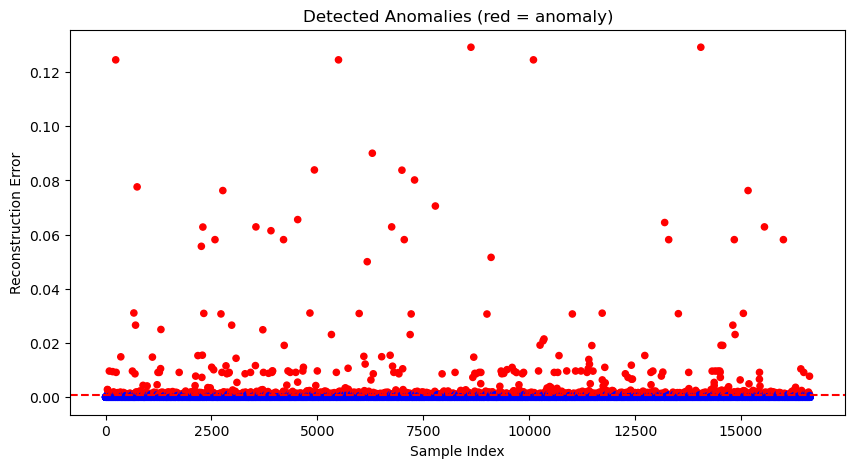

In [244]:
# Define a treshold for anomaly detection
threshold = np.percentile(mse, 95)  
print(f"Reconstruction error threshold: {threshold:.6f}")

# Classify points
anomalies = mse > threshold

# plot reconstruction errors
plt.figure(figsize=(10,5))
plt.plot(mse, label='Reconstruction error', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title("Reconstruction Error per Sample")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error (MSE)")
plt.legend()
plt.show()

# Summary of results
normal_count = np.sum(~anomalies)
anomaly_count = np.sum(anomalies)
print(f"Normal flights: {normal_count}")
print(f"Anomalous flights: {anomaly_count}")

# Scatter plot of reconstruction errors
plt.figure(figsize=(10,5))
plt.scatter(range(len(mse)), mse, c=['red' if a else 'blue' for a in anomalies], s=20)
plt.axhline(y=threshold, color='red', linestyle='--')
plt.title("Detected Anomalies (red = anomaly)")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.show()


Here we can see a lot more anomalies than when we tried fit the own labeled data into the model, the reasons for this and a comparison can be seen below in the disccussion.

## 4.3 Comparison between both models and discussion

520/520 [==============================] - 2s 4ms/step


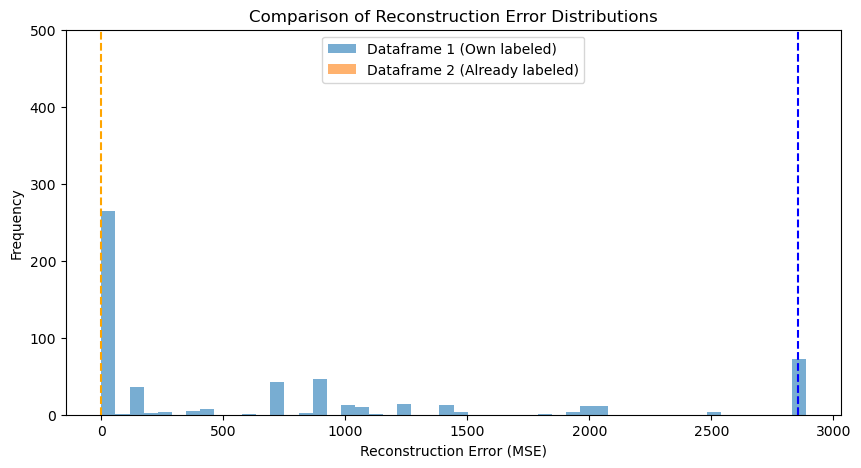

In [251]:
# Compute reconstruction error for both models
recon1 = model.predict(X_test)
recon2 = model_2.predict(X_test_2)

mse1 = np.mean(np.power(X_test - recon1, 2), axis=(1,2))
mse2 = np.mean(np.power(X_test_2 - recon2, 2), axis=(1,2))

# Plot histograms
plt.figure(figsize=(10,5))
plt.hist(mse1, bins=50, alpha=0.6, label='Dataframe 1 (Own labeled)')
plt.hist(mse2, bins=50, alpha=0.6, label='Dataframe 2 (Already labeled)')
plt.axvline(np.percentile(mse1,95), color='blue', linestyle='--')
plt.axvline(np.percentile(mse2,95), color='orange', linestyle='--')
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.title("Comparison of Reconstruction Error Distributions")
plt.ylim(0, 500)
plt.legend()
plt.show()

As we can see here the reconstruction error in the own labeled data is nearly 3000 meanwhile in the already labeled data is near 0, we fit the same model, but have completely different results, why is that?

- Different parameters:
    it's true that both dataset were *almost* identical, but in the already labeled data we dropped the ID and the Day, things that we keeped in the own labeled data, also the already labeled have columns like weeks.
- Larger dataset: 
    The already labeled dataset is much bigger, with many more inputs to analyze, also it contains informations of 2 hives, not only one.
- Bad filtering: 
    It can be that the filtering we did was not exhaustive or good enough. 

So, the model worked?
Well its difficult to say if one of the models worked, we don't really know how an anomaly looks like, therefore we can't say, hey this anomaly was detected correctly, we need to discuss this things with the PhD in order to know if what we did was right. 

Future approaches
Things can always we better, in this case, without any feedback yet we can think on 3 things to do to improve the model.
1.  More exhaustive filtering

        As we was saying filtering might have been good enough, we can improve that
2. Have a Y (target)

        how an anomaly flight looks like will be so helpful so that we can have a supervised problem and therefore easy to compare results. 
3. Try another model

        We can try another models and see if there are better options out there that can do the work.

# 5. Research papers and Thanks
I want to thank PhD Ulises Olivares for giving me the opportunity of being part of this project. 

Below you can find the different papers he have done about this topic if you want to read more about. 

https://doi.org/10.21203/rs.3.rs-6825046/v1

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4525546

## Useful links:
[Introduction to LSTM autoencoders](https://machinelearningmastery.com/lstm-autoencoders/)

[How to build an LSTM](https://www.geeksforgeeks.org/deep-learning/long-short-term-memory-lstm-rnn-in-tensorflow/)

[How to build Bidirectional Networks](https://www.geeksforgeeks.org/deep-learning/bidirectional-recurrent-neural-network/)